<p style='font-size:15px;color:green;font-weight:bold'>필요한 라이브러리 불러오기</p>

In [ ]:
#패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

<p style='font-size:15px;color:green;font-weight:bold'>데이터 전처리(유통 데이터)_시각화 활용(서론)</p>

In [ ]:
#데이터 파일 불러오기
#데이터 출처: 농림축산식품 공공데이터 포털
import_2017=pd.read_csv("./import_api_data/datas_2017.csv", encoding = 'cp949')
import_2018=pd.read_csv("./import_api_data/datas_2018.csv", encoding = 'cp949')
import_2019=pd.read_csv("./import_api_data/datas_2019.csv", encoding = 'cp949')
import_2020=pd.read_csv("./import_api_data/datas_2020.csv", encoding = 'cp949')
import_2021=pd.read_csv("./import_api_data/datas_2021.csv", encoding = 'cp949')
import_2022=pd.read_csv("./import_api_data/datas_2022.csv", encoding = 'cp949')

#2017년~2022년 유통 데이터

In [ ]:
#각 데이터세트의 날짜 데이터 형태 변환
#API를 활용해 데이터를 불러오는 과정에서 문자가 포함된 데이터 수정 작업

#2017년
import_2017[['IMPORT_DE']] = import_2017[['IMPORT_DE']].applymap(str).applymap(lambda s: "{}".format(s[11:19]))
import_2017[['DISTB_TMLMT_START_DE']] = import_2017[['DISTB_TMLMT_START_DE']].applymap(str).applymap(lambda s: "{}".format(s[22:30]))
import_2017[['DISTB_TMLMT_END_DE']] = import_2017[['DISTB_TMLMT_END_DE']].applymap(str).applymap(lambda s: "{}".format(s[20:28]))

#2018년
import_2018[['IMPORT_DE']] = import_2018[['IMPORT_DE']].applymap(str).applymap(lambda s: "{}".format(s[11:19]))
import_2018[['DISTB_TMLMT_START_DE']] = import_2018[['DISTB_TMLMT_START_DE']].applymap(str).applymap(lambda s: "{}".format(s[22:30]))
import_2018[['DISTB_TMLMT_END_DE']] = import_2018[['DISTB_TMLMT_END_DE']].applymap(str).applymap(lambda s: "{}".format(s[20:28]))

#2019년
import_2019[['IMPORT_DE']] = import_2019[['IMPORT_DE']].applymap(str).applymap(lambda s: "{}".format(s[11:19]))
import_2019[['DISTB_TMLMT_START_DE']] = import_2019[['DISTB_TMLMT_START_DE']].applymap(str).applymap(lambda s: "{}".format(s[22:30]))
import_2019[['DISTB_TMLMT_END_DE']] = import_2019[['DISTB_TMLMT_END_DE']].applymap(str).applymap(lambda s: "{}".format(s[20:28]))

#2020년
import_2020[['DISTB_TMLMT_START_DE']] = import_2020[['DISTB_TMLMT_START_DE']].applymap(str).applymap(lambda s: "{}".format(s[22:30]))
import_2020[['DISTB_TMLMT_END_DE']] = import_2020[['DISTB_TMLMT_END_DE']].applymap(str).applymap(lambda s: "{}".format(s[20:28]))
import_2020.head(3)

#2021년
import_2021[['IMPORT_DE']] = import_2021[['IMPORT_DE']].applymap(str).applymap(lambda s: "{}".format(s[11:19]))
import_2021[['DISTB_TMLMT_START_DE']] = import_2021[['DISTB_TMLMT_START_DE']].applymap(str).applymap(lambda s: "{}".format(s[22:30]))
import_2021[['DISTB_TMLMT_END_DE']] = import_2021[['DISTB_TMLMT_END_DE']].applymap(str).applymap(lambda s: "{}".format(s[20:28]))

#2022년
import_2022[['DISTB_TMLMT_START_DE']] = import_2022[['DISTB_TMLMT_START_DE']].applymap(str).applymap(lambda s: "{}".format(s[22:30]))
import_2022[['DISTB_TMLMT_END_DE']] = import_2022[['DISTB_TMLMT_END_DE']].applymap(str).applymap(lambda s: "{}".format(s[20:28]))

In [ ]:
#2017년~2022년 데이터 하나의 데이터 세트로 통합
import_data=pd.concat([import_2017,import_2018,import_2019,import_2020,import_2021,import_2022])
import_data.shape

(6601, 23)

In [ ]:
#불필요한 데이터 속성 제거
import_data=import_data.drop("Unnamed: 0", axis=1)
import_data=import_data.drop("DISTB_IDNTFC_NO", axis=1)
import_data=import_data.drop("STTUS", axis=1)
import_data=import_data.drop("ORGPLCE_NATION", axis=1)
import_data=import_data.drop("ROW_NUM", axis=1)
import_data=import_data.drop("OWR_CD", axis=1)
import_data=import_data.drop("REFRIG_CNVRS_SE", axis=1)
import_data=import_data.drop("SLE_AT", axis=1)
import_data=import_data.drop("EXCOURY_SLAU_START_DE", axis=1)
import_data=import_data.drop("EXCOURY_SLAU_END_DE", axis=1)
import_data=import_data.drop("EXCOURY_PRCSS_START_DE", axis=1)
import_data=import_data.drop("EXCOURY_PRCSS_END_DE", axis=1)
import_data=import_data.drop("BL_NO", axis=1)

In [ ]:
#날짜 데이터 형태 변경(yyyymm -> yyyy-mm)
import_data[['IMPORT_DE']] = import_data[['IMPORT_DE']].applymap(str).applymap(lambda s: "{}-{}-{}".format(s[0:4],s[4:6],s[6:]))
import_data[['DISTB_TMLMT_START_DE']] = import_data[['DISTB_TMLMT_START_DE']].applymap(str).applymap(lambda s: "{}-{}-{}".format(s[0:4],s[4:6],s[6:]))
import_data[['DISTB_TMLMT_END_DE']] = import_data[['DISTB_TMLMT_END_DE']].applymap(str).applymap(lambda s: "{}-{}-{}".format(s[0:4],s[4:6],s[6:]))
import_data.head(3)

,SE,PRDLST_CD,PRDLST_NM,STTUS_SE,IMPORT_DE,ORGPLCE_CD,QY,WT,DISTB_TMLMT_START_DE,DISTB_TMLMT_END_DE
0,1,2110111121,냉장쇠고기,0,2017-01-02,AU,149,2708.45,2017-03-04,2017-03-04
1,1,2110111221,냉동쇠고기,0,2017-01-02,AU,700,19040.00,2018-10-11,2018-11-27
2,1,2110143101,냉장소횡격막,0,2017-01-02,AU,20,202.80,2017-02-28,2017-03-01


<p style='font-size:15px;color:green;font-weight:bold'>데이터 전처리(질병 데이터)_시각화 활용(서론)</p>

In [ ]:
#데이터 파일 불러오기
#데이터 출처: 농림축산식품 공공데이터 포털
diease_data=pd.read_csv("./diease_data.csv", encoding = 'cp949')

In [ ]:
#모델에 적용할 데이터(소, 돼지, 닭)만 추출
diease_data_pig=diease_data[diease_data['LVSTCKSPC_NM'].str.contains('돼지')]
diease_data_chicken=diease_data[diease_data['LVSTCKSPC_NM'].str.contains('닭')]
diease_data_cow=diease_data[diease_data['LVSTCKSPC_NM'].str.contains('소')]

In [ ]:
#데이터 값들 중 필요한 문자열만 추출
diease_data_pig[['LVSTCKSPC_NM']] = diease_data_pig[['LVSTCKSPC_NM']].applymap(str).applymap(lambda s: "{}".format(s[0:2]))
diease_data_chicken[['LVSTCKSPC_NM']] = diease_data_chicken[['LVSTCKSPC_NM']].applymap(str).applymap(lambda s: "{}".format(s[0:1]))
diease_data_cow[['LVSTCKSPC_NM']] = diease_data_cow[['LVSTCKSPC_NM']].applymap(str).applymap(lambda s: "{}".format(s[0:1]))

C:\Users\jungm\AppData\Local\Temp\ipykernel_16740\642555378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diease_data_pig[['LVSTCKSPC_NM']] = diease_data_pig[['LVSTCKSPC_NM']].applymap(str).applymap(lambda s: "{}".format(s[0:2]))
C:\Users\jungm\AppData\Local\Temp\ipykernel_16740\642555378.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diease_data_chicken[['LVSTCKSPC_NM']] = diease_data_chicken[['LVSTCKSPC_NM']].applymap(str).applymap(lambda s: "{}".format(s[0:1]))
C:\Users\jungm\AppData\Local\Tem

In [ ]:
#각 가축 데이터 하나의 데이터 세트로 통합
diease_data = pd.concat([diease_data_pig,diease_data_chicken,diease_data_cow])

In [ ]:
#불필요한 데이터 속성 제거
diease_data=diease_data.drop("Unnamed: 0", axis=1)

In [ ]:
#날짜 데이터 형태 변경(yyyymm -> yyyy-mm)
diease_data[['OCCRRNC_DE']] = diease_data[['OCCRRNC_DE']].applymap(str).applymap(lambda s: "{}-{}-{}".format(s[0:4],s[4:6],s[6:]))
diease_data.head(3)

,ICTSD_OCCRRNC_NO,LKNTS_NM,FARM_NM,FARM_LOCPLC_LEGALDONG_CODE,FARM_LOCPLC,OCCRRNC_DE,LVSTCKSPC_CODE,LVSTCKSPC_NM,OCCRRNC_LVSTCKCNT,DGNSS_ENGN_CODE,DGNSS_ENGN_NM,CESSATION_DE
94,146239,돼지생식기호흡기증후군,0,5011025025,제주특별자치도 제주시 한림읍 금악리,2017-01-31,413005,돼지,3,6500320,제주 동물위생시험소,0
167,147212,돼지생식기호흡기증후군,조수행,4480034029,충청남도 홍성군 장곡면 지정리,2017-02-28,413017,돼지,0,6440952,충남 동물위생시험소,0
184,147397,돼지생식기호흡기증후군,정일농장,5011031024,제주특별자치도 제주시 한경면 판포리,2017-03-07,413005,돼지,1,6500320,제주 동물위생시험소,0


<p style='font-size:15px;color:green;font-weight:bold'>데이터 전처리(가격 데이터)_예측 모델 활용(본론)</p>

In [ ]:
#데이터 파일 불러오기
#데이터 출처: KADX 농식품 빅데이터 거래소
p17=pd.read_csv("./price_data_2017.csv", encoding = 'euc-kr')
p18=pd.read_csv("./price_data_2018.csv", encoding = 'euc-kr')
p19=pd.read_csv("./price_data_2019.csv", encoding = 'euc-kr')
p20=pd.read_csv("./price_data_2020.csv", encoding = 'euc-kr')
p21=pd.read_csv("./price_data_2021.csv", encoding = 'euc-kr')
p22=pd.read_csv("./price_data_2022.csv", encoding = 'euc-kr')

C:\Users\jungm\AppData\Local\Temp\ipykernel_16740\540023314.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  p17=pd.read_csv("./price_data_2017.csv", encoding = 'euc-kr')
C:\Users\jungm\AppData\Local\Temp\ipykernel_16740\540023314.py:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  p18=pd.read_csv("./price_data_2018.csv", encoding = 'euc-kr')
C:\Users\jungm\AppData\Local\Temp\ipykernel_16740\540023314.py:6: DtypeWarning: Columns (13,17) have mixed types. Specify dtype option on import or set low_memory=False.
  p20=pd.read_csv("./price_data_2020.csv", encoding = 'euc-kr')


In [ ]:
#2017년~2022년 데이터 하나의 데이터 세트로 통합
price_data = pd.concat([p17,p18,p19,p20,p21,p22])
price_data.head(3)

,PRCE_REG_YMD,MRKT_ESNT_NO,MRKT_CODE,MRKT_NM,CTNP_CODE,CTNP_NM,SGGU_CODE,SGGU_NM,PDLT_CODE,PDLT_NM,...,MTC_SMT_UNIT_MG,MTC_SMT_UNIT_NM,WHSL_SMT_UNIT_MG,WHSL_SMT_UNIT_NM,RTSL_SMT_UNIT_MG,RTSL_SMT_UNIT_NM,EVFD_FMPD_SMT_UNIT_MG,EVFD_FMPD_SMT_UNIT_NM,DCNT_PRCE_YN,ETL_LDG_DT
0,20170102,289,370001,죽도,37,경북,3711,포항,151.0,고구마,...,20,kg,10.0,kg,1.0,kg,1.0,kg,NaN,2.021061e+13
1,20170102,289,370001,죽도,37,경북,3711,포항,152.0,감자,...,NaN,NaN,20.0,kg,100.0,g,100.0,g,NaN,2.021061e+13
2,20170102,289,370001,죽도,37,경북,3711,포항,211.0,배추,...,1,kg,10.0,kg,1.0,포기,NaN,NaN,NaN,2.021061e+13


In [ ]:
#불필요한 데이터 속성 제거
price_data=price_data.drop(labels='MTC_SMT_UNIT_MG', axis=1)
price_data=price_data.drop(labels='MTC_SMT_UNIT_NM', axis=1)
price_data=price_data.drop(labels='EVFD_FMPD_SMT_UNIT_MG', axis=1)
price_data=price_data.drop(labels='EVFD_FMPD_SMT_UNIT_NM', axis=1)
price_data=price_data.drop("MRKT_NM", axis=1)
price_data=price_data.drop("MRKT_CODE", axis=1)
price_data=price_data.drop("CTNP_NM", axis=1)
price_data=price_data.drop("SGGU_CODE", axis=1)
price_data=price_data.drop("SGGU_NM", axis=1)
price_data=price_data.drop("ETL_LDG_DT", axis=1)
price_data=price_data.drop("WHSL_SMT_UNIT_MG", axis=1)
price_data=price_data.drop("WHSL_SMT_UNIT_NM", axis=1)
price_data=price_data.drop("BULK_GRAD_NM", axis=1)

In [ ]:
#결측값 처리
price_data['DCNT_PRCE_YN']=price_data['DCNT_PRCE_YN'].fillna('N')

#세일 여부 수치화
#0: N 1: Y
price_data.loc[price_data['DCNT_PRCE_YN'] == "N", 'DCNT_PRCE_YN'] = "0"
price_data.loc[price_data['DCNT_PRCE_YN'] == "Y", 'DCNT_PRCE_YN'] = "1"
price_data.head()

,PRCE_REG_YMD,MRKT_ESNT_NO,CTNP_CODE,PDLT_CODE,PDLT_NM,SPCS_CODE,SPCS_NM,WSRT_EXMN_SE_CODE,EXMN_SE_NM,BULK_GRAD_CODE,PDLT_PRCE,RTSL_SMT_UNIT_MG,RTSL_SMT_UNIT_NM,DCNT_PRCE_YN
0,20170102,289,37,151.0,고구마,0.0,밤,1.0,소매,4.0,5000.0,1.0,kg,0
1,20170102,289,37,152.0,감자,1.0,수미,1.0,소매,4.0,270.0,100.0,g,0
2,20170102,289,37,211.0,배추,6.0,월동,1.0,소매,4.0,4000.0,1.0,포기,0
3,20170102,289,37,212.0,양배추,0.0,양배추,1.0,소매,4.0,5660.0,1.0,포기,0
4,20170102,289,37,213.0,시금치,0.0,시금치,1.0,소매,4.0,6080.0,1.0,kg,0


In [ ]:
#전체 데이터 중 고기 데이터만 추출
price_meat= price_data[(price_data['PDLT_NM']=='돼지고기')|(price_data['PDLT_NM']=='쇠고기')|(price_data['PDLT_NM']=='닭고기')]

In [ ]:
#소매 데이터만 수집
price_meat=price_meat[(price_meat['EXMN_SE_NM']=='소매')]

#소매 데이터만 모았으므로 도소매 구분 코드, 데이터 필요 없음
price_meat=price_meat.drop("EXMN_SE_NM", axis=1)
price_meat=price_meat.drop("WSRT_EXMN_SE_CODE", axis=1)

In [ ]:
#날짜 데이터 형태 변경(yyyymm -> yyyy-mm)
price_meat[['PRCE_REG_YMD']] = price_meat[['PRCE_REG_YMD']].applymap(str).applymap(lambda s: "{}-{}-{}".format(s[0:4],s[4:6], s[6:]))

In [ ]:
#국내 고기 데이터, 수입 고기 데이터 분리
price_meat_kor=price_meat[price_meat['SPCS_NM'].str.contains('한우')|price_meat['SPCS_NM'].str.contains('국산')]
price_meat_imp=price_meat[~price_meat['SPCS_NM'].str.contains('한우')&~price_meat['SPCS_NM'].str.contains('국산')]

#'미국산' 키워드는 별도로 제거 및 추가
#미국산 키둬드가 들어간 데이터 추출
data=price_meat_kor[price_meat_kor['SPCS_NM'].str.contains('미국산')]

#국내산 데이터에서 미국산 키워드가 들어간 데이터 제거
price_meat_kor=price_meat_kor[~price_meat_kor['SPCS_NM'].str.contains('미국산')]
#수집산 데이터와 미국산 키둬드 데이터 통합
price_meat_imp = pd.concat([price_meat_imp,data])

price_meat_kor.shape
price_meat_imp.shape

(296706, 12)

In [ ]:
#무게 데이터, 단위 데이터 속성 통합
#수입 고기 데이터에 닭고기 가격 데이터가 포함되어 있어 100g, 1kg 데이터가 섞여있다.(국내산 고기 데이터는 해당X)
price_meat_imp[['RTSL_SMT_UNIT_MG']] = price_meat_imp[['RTSL_SMT_UNIT_MG']].applymap(str).applymap(lambda s: "{}g".format(s[0:]))

price_meat_imp1=price_meat_imp[price_meat_imp['RTSL_SMT_UNIT_MG'].str.contains('100.0g')]
price_meat_imp2=price_meat_imp[price_meat_imp['RTSL_SMT_UNIT_MG'].str.contains('1.0g')]

#변경된 단위만큼 가격 데이터 변경
price_meat_imp2['PDLT_PRCE'] = price_meat_imp2['PDLT_PRCE'].div(10)

price_meat_imp = pd.concat([price_meat_imp1,price_meat_imp2])

C:\Users\jungm\AppData\Local\Temp\ipykernel_16740\1459241550.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_meat_imp2['PDLT_PRCE'] = price_meat_imp2['PDLT_PRCE'].div(10)


In [ ]:
#가격 데이터의 무게 단위를 통일시켰으므로 해당 속성을 제거해도 무방하다.
price_meat_imp=price_meat_imp.drop(labels='RTSL_SMT_UNIT_MG', axis=1)
price_meat_imp=price_meat_imp.drop(labels='RTSL_SMT_UNIT_NM', axis=1)
price_meat_kor=price_meat_kor.drop(labels='RTSL_SMT_UNIT_MG', axis=1)
price_meat_kor=price_meat_kor.drop(labels='RTSL_SMT_UNIT_NM', axis=1)
price_meat_imp.head(3)

,PRCE_REG_YMD,MRKT_ESNT_NO,CTNP_CODE,PDLT_CODE,PDLT_NM,SPCS_CODE,SPCS_NM,BULK_GRAD_CODE,PDLT_PRCE,DCNT_PRCE_YN
108,2017-01-02,286,11,514.0,돼지고기,2.0,목살,5.0,1750.0,0
110,2017-01-02,286,11,514.0,돼지고기,3.0,돼지갈비,5.0,1200.0,0
111,2017-01-02,286,11,514.0,돼지고기,4.0,앞다리살,5.0,1250.0,0


In [ ]:
price_meat_kor.head(3)

,PRCE_REG_YMD,MRKT_ESNT_NO,CTNP_CODE,PDLT_CODE,PDLT_NM,SPCS_CODE,SPCS_NM,BULK_GRAD_CODE,PDLT_PRCE,DCNT_PRCE_YN
86,2017-01-02,286,11,512.0,쇠고기,12.0,한우등심,1.0,7900.0,0
87,2017-01-02,286,11,512.0,쇠고기,13.0,한우불고기,1.0,4700.0,0
88,2017-01-02,286,11,514.0,돼지고기,0.0,삼겹살(국산냉장),5.0,1750.0,0


<p style='font-size:15px;color:green;font-weight:bold'>데이터 전처리(고객 트렌드 데이터)_추천 모델 활용(결론)</p>

In [ ]:
#데이터 파일 불러오기
#데이터 출처: KADX 농식품 빅데이터 거래소
man_21=pd.read_csv("./2021_man.csv", encoding = 'UTF-8')
man_22=pd.read_csv("./2022_man.csv", encoding = 'UTF-8')
woman_21=pd.read_csv("./2021_woman.csv", encoding = 'UTF-8')
woman_22=pd.read_csv("./2022_woman.csv", encoding = 'UTF-8')

In [ ]:
#남성, 여성 데이터끼리 합치기
man=pd.concat([man_21, man_21])
woman=pd.concat([woman_21, woman_21])

In [ ]:
#각 데이터 속성 명 변경
man = man.rename(columns=man.iloc[0])
woman = woman.rename(columns=woman.iloc[0])

In [ ]:
#불필요한 데이터 속성 제거
man=man.drop(0, axis=1)
man=man.drop("구매채널 선택이유", axis=1)
man=man.drop("등급", axis=1)
man=man.drop("세부부위", axis=1)
man=man.drop("구매채널", axis=1)
man=man.drop('주차', axis=1)
man=man.drop('가구원수', axis=1)
man=man.drop('구매중량', axis=1)
man=man.drop('유통상태', axis=1)

woman=woman.drop(0, axis=1)
woman=woman.drop("세부부위", axis=1)
woman=woman.drop("구매채널 선택이유", axis=1)
woman=woman.drop('등급', axis=1)

In [ ]:
#문자열 데이터 -> 수치형 데이터로 변경
man.loc[man['익월 국내산 쇠고기 구입의향'] == '매우 많음', '익월 국내산 쇠고기 구입의향'] = 5
man.loc[man['익월 국내산 쇠고기 구입의향'] == '많음', '익월 국내산 쇠고기 구입의향'] = 4
man.loc[man['익월 국내산 쇠고기 구입의향'] == '보통', '익월 국내산 쇠고기 구입의향'] = 3
man.loc[man['익월 국내산 쇠고기 구입의향'] == '적음', '익월 국내산 쇠고기 구입의향'] = 2
man.loc[man['익월 국내산 쇠고기 구입의향'] == '매우 적음', '익월 국내산 쇠고기 구입의향'] = 1

man.loc[man['익월 수입산 쇠고기 구입의향'] == '매우 많음', '익월 수입산 쇠고기 구입의향'] = 5
man.loc[man['익월 수입산 쇠고기 구입의향'] == '많음', '익월 수입산 쇠고기 구입의향'] = 4
man.loc[man['익월 수입산 쇠고기 구입의향'] == '보통', '익월 수입산 쇠고기 구입의향'] = 3
man.loc[man['익월 수입산 쇠고기 구입의향'] == '적음', '익월 수입산 쇠고기 구입의향'] = 2
man.loc[man['익월 수입산 쇠고기 구입의향'] == '매우 적음', '익월 수입산 쇠고기 구입의향'] = 1

man.loc[man['익월 국내산 돼지고기 구입의향'] == '매우 많음', '익월 국내산 돼지고기 구입의향'] = 5
man.loc[man['익월 국내산 돼지고기 구입의향'] == '많음', '익월 국내산 돼지고기 구입의향'] = 4
man.loc[man['익월 국내산 돼지고기 구입의향'] == '보통', '익월 국내산 돼지고기 구입의향'] = 3
man.loc[man['익월 국내산 돼지고기 구입의향'] == '적음', '익월 국내산 돼지고기 구입의향'] = 2
man.loc[man['익월 국내산 돼지고기 구입의향'] == '매우 적음', '익월 국내산 돼지고기 구입의향'] = 1

man.loc[man['익월 수입산 돼지고기 구입의향'] == '매우 많음', '익월 수입산 돼지고기 구입의향'] = 5
man.loc[man['익월 수입산 돼지고기 구입의향'] == '많음', '익월 수입산 돼지고기 구입의향'] = 4
man.loc[man['익월 수입산 돼지고기 구입의향'] == '보통', '익월 수입산 돼지고기 구입의향'] = 3
man.loc[man['익월 수입산 돼지고기 구입의향'] == '적음', '익월 수입산 돼지고기 구입의향'] = 2
man.loc[man['익월 수입산 돼지고기 구입의향'] == '매우 적음', '익월 수입산 돼지고기 구입의향'] = 1

man.loc[man['재구매의사'] == '매우 많음', '재구매의사'] = 5
man.loc[man['재구매의사'] == '많음', '재구매의사'] = 4
man.loc[man['재구매의사'] == '보통', '재구매의사'] = 3
man.loc[man['재구매의사'] == '적음', '재구매의사'] = 2
man.loc[man['재구매의사'] == '매우 적음', '재구매의사'] = 1

woman.loc[woman['익월 국내산 쇠고기 구입의향'] == '매우 많음', '익월 국내산 쇠고기 구입의향'] = 5
woman.loc[woman['익월 국내산 쇠고기 구입의향'] == '많음', '익월 국내산 쇠고기 구입의향'] = 4
woman.loc[woman['익월 국내산 쇠고기 구입의향'] == '보통', '익월 국내산 쇠고기 구입의향'] = 3
woman.loc[woman['익월 국내산 쇠고기 구입의향'] == '적음', '익월 국내산 쇠고기 구입의향'] = 2
woman.loc[woman['익월 국내산 쇠고기 구입의향'] == '매우 적음', '익월 국내산 쇠고기 구입의향'] = 1

woman.loc[woman['익월 수입산 쇠고기 구입의향'] == '매우 많음', '익월 수입산 쇠고기 구입의향'] = 5
woman.loc[woman['익월 수입산 쇠고기 구입의향'] == '많음', '익월 수입산 쇠고기 구입의향'] = 4
woman.loc[woman['익월 수입산 쇠고기 구입의향'] == '보통', '익월 수입산 쇠고기 구입의향'] = 3
woman.loc[woman['익월 수입산 쇠고기 구입의향'] == '적음', '익월 수입산 쇠고기 구입의향'] = 2
woman.loc[woman['익월 수입산 쇠고기 구입의향'] == '매우 적음', '익월 수입산 쇠고기 구입의향'] = 1

woman.loc[woman['익월 국내산 돼지고기 구입의향'] == '매우 많음', '익월 국내산 돼지고기 구입의향'] = 5
woman.loc[woman['익월 국내산 돼지고기 구입의향'] == '많음', '익월 국내산 돼지고기 구입의향'] = 4
woman.loc[woman['익월 국내산 돼지고기 구입의향'] == '보통', '익월 국내산 돼지고기 구입의향'] = 3
woman.loc[woman['익월 국내산 돼지고기 구입의향'] == '적음', '익월 국내산 돼지고기 구입의향'] = 2
woman.loc[woman['익월 국내산 돼지고기 구입의향'] == '매우 적음', '익월 국내산 돼지고기 구입의향'] = 1

woman.loc[woman['익월 수입산 돼지고기 구입의향'] == '매우 많음', '익월 수입산 돼지고기 구입의향'] = 5
woman.loc[woman['익월 수입산 돼지고기 구입의향'] == '많음', '익월 수입산 돼지고기 구입의향'] = 4
woman.loc[woman['익월 수입산 돼지고기 구입의향'] == '보통', '익월 수입산 돼지고기 구입의향'] = 3
woman.loc[woman['익월 수입산 돼지고기 구입의향'] == '적음', '익월 수입산 돼지고기 구입의향'] = 2
woman.loc[woman['익월 수입산 돼지고기 구입의향'] == '매우 적음', '익월 수입산 돼지고기 구입의향'] = 1

woman.loc[woman['재구매의사'] == '매우 많음', '재구매의사'] = 5
woman.loc[woman['재구매의사'] == '많음', '재구매의사'] = 4
woman.loc[woman['재구매의사'] == '보통', '재구매의사'] = 3
woman.loc[woman['재구매의사'] == '적음', '재구매의사'] = 2
woman.loc[woman['재구매의사'] == '매우 적음', '재구매의사'] = 1

man.loc[man['성별'] == '남자', '성별'] = 0

woman.loc[woman['성별'] == '여자', '성별'] = 1

In [ ]:
#1차 전처리(수치화) 완료된 데이터 하나의 데이터 세트로 합치기
trend_data=pd.concat([man, woman])
trend_data=trend_data.drop(0, axis=0)
trend_data.shape

#수치형으로 전처리 하지 않은 데이터 변수에 저장해두기
trend_data_str=trend_data
trend_data_str.head(3)

,지역,성별,연령대,직업,가구소득(월),육종,원산지,구매가격,구매시 고려사항,구매목적,재구매의사,익월 국내산 쇠고기 구입의향,익월 수입산 쇠고기 구입의향,익월 국내산 돼지고기 구입의향,익월 수입산 돼지고기 구입의향
1,강원,0,25~29세,직장인 (회사원/공무원),600~800만원,쇠고기,한우,33600,품질(등급),가족식사,4,5,3,4,3
2,강원,0,25~29세,직장인 (회사원/공무원),600~800만원,쇠고기,한우,26840,품질(등급),가족식사,4,5,3,4,3
3,강원,0,25~29세,직장인 (회사원/공무원),600~800만원,쇠고기,한우,26840,품질(등급),가족식사,4,5,3,4,3


In [ ]:
#2차 전처리(수치화)
#문자열 데이터 -> 수치형 데이터로 변경
trend_data.loc[trend_data['연령대'] == '25~29세', '연령대'] = 20
trend_data.loc[trend_data['연령대'] == '30~39세', '연령대'] = 30
trend_data.loc[trend_data['연령대'] == '40~49세', '연령대'] = 40
trend_data.loc[trend_data['연령대'] == '50~59세', '연령대'] = 50
trend_data.loc[trend_data['연령대'] == '60~69세', '연령대'] = 60

trend_data.loc[trend_data['가구소득(월)'] == '200만원 미만', '가구소득(월)'] = 200
trend_data.loc[trend_data['가구소득(월)'] == '200~400만원', '가구소득(월)'] = 300
trend_data.loc[trend_data['가구소득(월)'] == '400~600만원', '가구소득(월)'] = 500
trend_data.loc[trend_data['가구소득(월)'] == '600~800만원', '가구소득(월)'] = 700
trend_data.loc[trend_data['가구소득(월)'] == '800~1,000만원', '가구소득(월)'] = 900
trend_data.loc[trend_data['가구소득(월)'] == '1,000만원 이상', '가구소득(월)'] = 1000

trend_data.loc[trend_data['직업'] == '직장인 (회사원/공무원)', '직업'] = 1
trend_data.loc[trend_data['직업'] == '전업주부', '직업'] = 2
trend_data.loc[trend_data['직업'] == '파트타임', '직업'] = 3
trend_data.loc[trend_data['직업'] == '기타(무직)', '직업'] = 4
trend_data.loc[trend_data['직업'] == '자영업', '직업'] = 5
trend_data.loc[trend_data['직업'] == '대학생/대학원생', '직업'] = 6

trend_data.loc[trend_data['구매목적'] == '가족식사', '구매목적'] = 1
trend_data.loc[trend_data['구매목적'] == '기타', '구매목적'] = 2
trend_data.loc[trend_data['구매목적'] == '캠핑/여행', '구매목적'] = 3
trend_data.loc[trend_data['구매목적'] == '선물', '구매목적'] = 4

trend_data.loc[trend_data['구매시 고려사항'] == '품질(등급)', '구매시 고려사항'] = 1
trend_data.loc[trend_data['구매시 고려사항'] == '원산지', '구매시 고려사항'] = 2
trend_data.loc[trend_data['구매시 고려사항'] == '신선도', '구매시 고려사항'] = 3
trend_data.loc[trend_data['구매시 고려사항'] == '가격', '구매시 고려사항'] = 4
trend_data.loc[trend_data['구매시 고려사항'] == '기타', '구매시 고려사항'] = 5

trend_data.head(3)

,지역,성별,연령대,직업,가구소득(월),육종,원산지,구매가격,구매시 고려사항,구매목적,재구매의사,익월 국내산 쇠고기 구입의향,익월 수입산 쇠고기 구입의향,익월 국내산 돼지고기 구입의향,익월 수입산 돼지고기 구입의향
1,강원,0,20,1,700,쇠고기,한우,33600,1,1,4,5,3,4,3
2,강원,0,20,1,700,쇠고기,한우,26840,1,1,4,5,3,4,3
3,강원,0,20,1,700,쇠고기,한우,26840,1,1,4,5,3,4,3


<p style='font-size:15px;color:green;font-weight:bold'>데이터 전처리(요리 레시피 데이터)_추천 모델 활용(결론)</p>

In [ ]:
#데이터 파일 불러오기
#데이터 출처: KADX 농식품 빅데이터 거래소
recipe_data=pd.read_csv("./recipe_data.csv", encoding = 'euc-kr')

In [ ]:
#불필요한 데이터 속성 제거
recipe_data=recipe_data.drop('Unnamed: 0',axis=1)

In [ ]:
#전체 데이터의 결측치 확인(개수)
pd.DataFrame(data=recipe_data.isnull().sum(),columns=['nan_ratio'])

#결측치가 다수 존재하는 인분 수, 소요 시간 제거

,nan_ratio
CKG_NM,1961
INQ_CNT,0
RCMM_CNT,0
SRAP_CNT,0
CKG_STA_ACTO_NM,890
CKG_KND_ACTO_NM,0
CKG_MTRL_CN,1060
CKG_INBUN_NM,4229
CKG_DODF_NM,263
CKG_TIME_NM,8346


In [ ]:
#결측치가 다수 존재하는 행 제거
recipe_data=recipe_data.drop('CKG_INBUN_NM',axis=1)
recipe_data=recipe_data.drop('CKG_TIME_NM',axis=1)

#레시피 명이 존재하지 않는 행 제거
recipe_data=recipe_data.dropna()
recipe_data.shape

(124364, 8)

In [ ]:
recipe_data.head(3)

,CKG_NM,INQ_CNT,RCMM_CNT,SRAP_CNT,CKG_STA_ACTO_NM,CKG_KND_ACTO_NM,CKG_MTRL_CN,CKG_DODF_NM
0,어묵김말이,9592,6,66,간식,디저트,[재료] 어묵 2개| 김밥용김 3장| 당면 1움큼| 양파 1/2개| 당근 1/2개|...,초급
1,두부새우전,5538,3,26,일상,밑반찬,[재료] 두부 1/2모| 당근 1/2개| 고추 2개| 브로콜리 1/4개| 새우 4마...,초급
2,알밥,6802,8,36,일상,밥/죽/떡,[재료] 밥 1+1/2공기| 당근 1/4개| 치자단무지 1/2개| 신김치 1쪽| 무...,초급


<p style='font-size:15px;color:green;font-weight:bold'>예측 모델 생성(Random Forest, LGBM, CatBoost) 및 고도화</p>

In [ ]:
#예측 모델 적용을 위해 문자형 데이터 속성 제거
price_kor_num=price_meat_kor.drop("PDLT_NM", axis=1)
price_kor_num=price_kor_num.drop("SPCS_NM", axis=1)

price_imp_num=price_meat_imp.drop("PDLT_NM", axis=1)
price_imp_num=price_imp_num.drop("SPCS_NM", axis=1)

In [ ]:
#날짜 데이터 형태 변경(yyyymm -> 0000, 00 , 00 별도 속성 생성)
price_kor_num['YEAR'] = price_kor_num[['PRCE_REG_YMD']].applymap(str).applymap(lambda s: "{}".format(s[0:4]))
price_kor_num['MONTH'] = price_kor_num[['PRCE_REG_YMD']].applymap(str).applymap(lambda s: "{}".format(s[5:7]))
price_kor_num['DAY'] = price_kor_num[['PRCE_REG_YMD']].applymap(str).applymap(lambda s: "{}".format(s[8:]))

price_imp_num['YEAR'] = price_imp_num[['PRCE_REG_YMD']].applymap(str).applymap(lambda s: "{}".format(s[0:4]))
price_imp_num['MONTH'] = price_imp_num[['PRCE_REG_YMD']].applymap(str).applymap(lambda s: "{}".format(s[5:7]))
price_imp_num['DAY'] = price_imp_num[['PRCE_REG_YMD']].applymap(str).applymap(lambda s: "{}".format(s[8:]))

In [ ]:
#기존 날짜 데이터 제거
price_kor_num=price_kor_num.drop("PRCE_REG_YMD", axis=1)
price_imp_num=price_imp_num.drop("PRCE_REG_YMD", axis=1)

In [ ]:
#날짜 데이터 형태 변환(str -> int)
price_kor_num['YEAR']=price_kor_num['YEAR'].astype(int)
price_kor_num['MONTH']=price_kor_num['MONTH'].astype(int)
price_kor_num['DAY']=price_kor_num['DAY'].astype(int)

price_imp_num['YEAR']=price_imp_num['YEAR'].astype(int)
price_imp_num['MONTH']=price_imp_num['MONTH'].astype(int)
price_imp_num['DAY']=price_imp_num['DAY'].astype(int)

In [ ]:
#국내산 고기 가격 예측 모델 생성 과정

#데이터 표준화(MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(price_kor_num)
price_std_kor = sc.transform(price_kor_num)

#표준화된 데이터를 행렬행태로 변환
price_std_kor=pd.DataFrame(price_std_kor, columns=['MRKT_ESNT_NO','CTNP_CODE','PDLT_CODE','SPCS_CODE','BULK_GRAD_CODE','PDLT_PRCE','DCNT_PRCE_YN','YEAR','MONTH','DAY'])

#표준화된 데이터 세트의 인덱스명을 원본 수치데이터의 인덱스와 동일하게 변경
price_std_kor=price_std_kor.set_index(price_kor_num.index)

In [ ]:
#데이터 분할(학습용, 평가용)
from sklearn.model_selection import train_test_split
feature_columns = list(price_std_kor.columns.difference(['PDLT_PRCE']))
X = price_std_kor[feature_columns]
y = price_std_kor['PDLT_PRCE']

# 학습데이터와 평가데이터의 비율을 7:3 로 분할
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(158671, 9) (68003, 9) (158671,) (68003,)


In [ ]:
"""
모델 성능 측정 지표
MEA: 실제값과 예측값의 차이를 절대값으로 변환해서 평균화
MSE: 실제값과 예측값의 차이를 제곱해 평균화(차이 면적의 합)
RMSE: MSE값에 루트를 씌운 것
오차값이기 때문에 값이 작을수록 정확도가 높다

R2: 분산 기반으로 예측 성능 평가(1에 가까울 수록 정확도 높음)
"""

In [ ]:
#Random Forests 모델 생성(defalt 값)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

forest = RandomForestRegressor()
forest.fit(train_x, train_y)
y_pred = forest.predict(test_x)

mae=mean_absolute_error(test_y,y_pred)
mse=mean_squared_error(test_y,y_pred)
rmse=(np.sqrt(mse))
r2=r2_score(test_y, y_pred)

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r2)

MAE:  0.003496696432618309
MSE:  0.00012897294749043391
RMSE:  0.011356625708828918
R2:  0.9962464030207554


In [ ]:
#LGBM 모델 생성(defalt 값)(적은 값(약 1만건 이하)에서는 오버피팅 발생)
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lgbm = lgb.LGBMRegressor()
lgbm.fit(train_x, train_y)
y_pred = lgbm.predict(test_x)

mae=mean_absolute_error(test_y,y_pred)
mse=mean_squared_error(test_y,y_pred)
rmse=(np.sqrt(mse))
r2=r2_score(test_y, y_pred)

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r2)

MAE:  0.019335363534158278
MSE:  0.0008008088239369573
RMSE:  0.028298565757595512
R2:  0.9766934567211847


In [ ]:
#수입산 고기 가격 예측 모델 생성 과정

#데이터 표준화(MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(price_imp_num)
price_std = sc.transform(price_imp_num)

#표준화된 데이터를 행렬행태로 변환
price_std=pd.DataFrame(price_std, columns=['MRKT_ESNT_NO','CTNP_CODE','PDLT_CODE','SPCS_CODE','BULK_GRAD_CODE','PDLT_PRCE','DCNT_PRCE_YN','YEAR','MONTH','DAY'])

#표준화된 데이터 세트의 인덱스명을 원본 수치데이터의 인덱스와 동일하게 변경
price_std=price_std.set_index(price_imp_num.index)

In [ ]:
#데이터 분할(학습용, 평가용)
from sklearn.model_selection import train_test_split
feature_columns = list(price_std.columns.difference(['PDLT_PRCE']))
X = price_std[feature_columns]
y = price_std['PDLT_PRCE']

# 학습데이터와 평가데이터의 비율을 7:3 로 분할
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(207694, 9) (89012, 9) (207694,) (89012,)


In [ ]:
#Random Forests 모델 생성(defalt 값)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

forest = RandomForestRegressor()
forest.fit(train_x, train_y)
y_pred = forest.predict(test_x)

mae=mean_absolute_error(test_y,y_pred)
mse=mean_squared_error(test_y,y_pred)
rmse=(np.sqrt(mse))
r2=r2_score(test_y, y_pred)

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r2)

MAE:  0.003978038662644173
MSE:  0.00012336981854909414
RMSE:  0.01110719670074741
R2:  0.9886106228587377


In [ ]:
#LGBM 모델 생성(defalt 값) 적은 값(약 1만건 이하에서는 오버피팅 발생)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lgbm = lgb.LGBMRegressor()
lgbm.fit(train_x, train_y)
y_pred = lgbm.predict(test_x)

mae=mean_absolute_error(test_y,y_pred)
mse=mean_squared_error(test_y,y_pred)
rmse=(np.sqrt(mse))
r2=r2_score(test_y, y_pred)

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r2)

MAE:  0.016089267150217277
MSE:  0.000585481876885782
RMSE:  0.02419673277295474
R2:  0.9459489040054582


In [ ]:
"""
국내산 고기 가격 예측 정확도
1. Random Forest
mae:  0.003514168679436696
mse:  0.0001297833353849531
rmse:  0.011392248916915091
r2:  0.9962228176905596

2. LGBM
mae:  0.019335363534158278
mse:  0.0008008088239369573
rmse:  0.028298565757595512
r2:  0.9766934567211847

3. CatBoost
mae:  0.015153500069408942
mse:  0.0005281883520417612
rmse:  0.02298234870594738
r2:  0.9846277359611155

4. SVR
mae:  0.09430699618162655
mse:  0.019818838801873503
rmse:  0.14077939764707584
r2:  0.42319738436337184


수입산 고기 가격 예측
1. Random Forest
mae:  0.003984291924478425
mse:  0.00012490289899271502
rmse:  0.011175996554791658
r2:  0.9884256956791321

2. LGBM
mae:  0.016000073604489816
mse:  0.0005807898866841601
rmse:  0.02409958270767691
r2:  0.9461802812490611

3. CatBoost
mae:  0.013168969148709514
mse:  0.00044191736662449195
rmse:  0.021021830715341895
r2:  0.9590491003232299

4. SVR
mae:  0.046423107528363594
mse:  0.005218647516491971
rmse:  0.07224020706290903
r2:  0.5164066247754378

정확도가 가장 우수한 모델: Random Forest
                           LGBM, CatBoost 정확도 유사
정확도가 가장 떨어지는 모델: SVR
"""

<p style='font-size:15px;color:green;font-weight:bold'>추천 모델 생성(K-means, Random Forest) 및 결과물 출력_트렌드, 레시피 데이터 사용</p>

In [ ]:
#예측 모델 적용을 위해 문자형 데이터 속성 제거(수치형 데이터 세트 생성)
trend_num=pd.DataFrame(data=trend_data, columns=['성별','연령대','직업',"가구소득(월)","구매시 고려사항","구매목적","재구매의사","익월 국내산 쇠고기 구입의향","익월 수입산 쇠고기 구입의향","익월 국내산 돼지고기 구입의향","익월 수입산 돼지고기 구입의향"])
trend_num.head(3)

,성별,연령대,직업,가구소득(월),구매시 고려사항,구매목적,재구매의사,익월 국내산 쇠고기 구입의향,익월 수입산 쇠고기 구입의향,익월 국내산 돼지고기 구입의향,익월 수입산 돼지고기 구입의향
1,0,20,1,700,1,1,4,5,3,4,3
2,0,20,1,700,1,1,4,5,3,4,3
3,0,20,1,700,1,1,4,5,3,4,3


C:\Users\jungm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\jungm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\jungm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\jungm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\jungm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning:

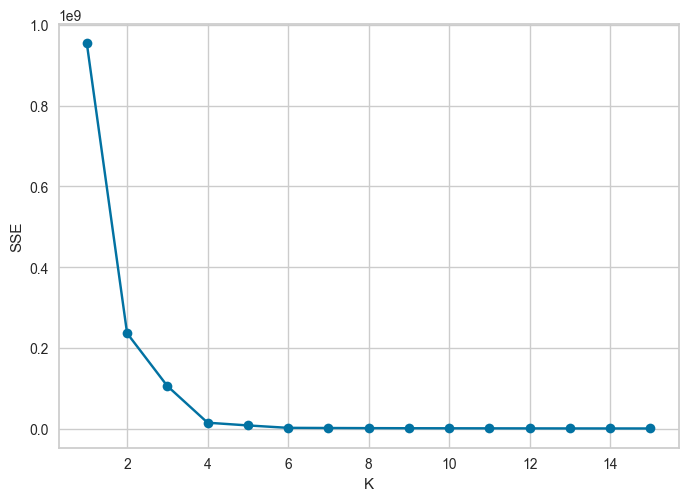

In [ ]:
#군집화 모델 적용을 위한 군집(k)값 탐색
#elbow 기법 적용
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
def elbow(x):
    sse = []
    for i in range(1,16):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42) #무작위성 컨트롤
        km.fit(x)
        sse.append(km.inertia_)

    plt.plot(range(1,16), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()
elbow(trend_num)

#k=3 ~ 6이 가장 적절하다.

In [ ]:
trend_array=trend_num.to_numpy()

In [ ]:
#정확한 k값 탐색을 위해 silhouette_score 추출

#k=3인 경우
#kmeans의 객체 생성
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,init='k-means++')
model.fit(trend_num)
print("클러스터 레이블 확인 : \n {}".format(model.labels_))

#클러스터 계수 출력
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(trend_num, model.labels_ )
print(score_samples.shape)
print(score_samples)

#기존 데이터에 클러스터 값, 실루엣 계수 행 추가
trend_num['cluster']=model.labels_
trend_num['silhouette_score']=score_samples
trend_num

print(trend_num.groupby('cluster')['silhouette_score'].mean())

#총 클러스터의 실수엣계수 평균
average_score = silhouette_score(trend_array.data,trend_num['cluster'])
print("실루엣 계수:{0:.3f}".format(average_score))

클러스터 레이블 확인 : 
 [1 1 1 ... 0 0 0]
(18512,)
[0.41329955 0.41329955 0.41329955 ... 0.8908319  0.89137882 0.83626527]
cluster
0    0.856860
1    0.540665
2    0.947989
Name: silhouette_score, dtype: float64
실루엣 계수:0.769


In [ ]:
#k=4인 경우
#kmeans의 객체 생성
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4,init='k-means++')
model.fit(trend_num)
print("클러스터 레이블 확인 : \n {}".format(model.labels_))

#클러스터 계수 출력
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(trend_num, model.labels_ )
print(score_samples.shape)
print(score_samples)

#기존 데이터에 클러스터 값, 실루엣 계수 행 추가
trend_num['cluster']=model.labels_
trend_num['silhouette_score']=score_samples
trend_num

print(trend_num.groupby('cluster')['silhouette_score'].mean())

#총 클러스터의 실수엣계수 평균
average_score = silhouette_score(trend_array.data,trend_num['cluster'])
print("실루엣 계수:{0:.3f}".format(average_score))

클러스터 레이블 확인 : 
 [3 3 3 ... 2 2 2]
(18512,)
[0.9010136  0.9010136  0.9010136  ... 0.89083718 0.89138408 0.83627312]
cluster
0    0.944745
1    0.792660
2    0.856865
3    0.939688
Name: silhouette_score, dtype: float64
실루엣 계수:0.891


In [ ]:
#k=5인 경우
#kmeans의 객체 생성
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5,init='k-means++')
model.fit(trend_num)
print("클러스터 레이블 확인 : \n {}".format(model.labels_))

#클러스터 계수 출력
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(trend_num, model.labels_ )
print(score_samples.shape)
print(score_samples)

#기존 데이터에 클러스터 값, 실루엣 계수 행 추가
trend_num['cluster']=model.labels_
trend_num['silhouette_score']=score_samples
trend_num

print(trend_num.groupby('cluster')['silhouette_score'].mean())

#총 클러스터의 실수엣계수 평균
average_score = silhouette_score(trend_array.data,trend_num['cluster'])
print("실루엣 계수:{0:.3f}".format(average_score))

클러스터 레이블 확인 : 
 [3 3 3 ... 2 2 2]
(18512,)
[0.90102284 0.90102284 0.90102284 ... 0.89083718 0.89138408 0.83627312]
cluster
0    0.886948
1    0.944751
2    0.856865
3    0.939686
4    0.899071
Name: silhouette_score, dtype: float64
실루엣 계수:0.908


In [ ]:
#k=6인 경우
#kmeans의 객체 생성
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6,init='k-means++')
model.fit(trend_num)
print("클러스터 레이블 확인 : \n {}".format(model.labels_))

#클러스터 계수 출력
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(trend_num, model.labels_ )
print(score_samples.shape)
print(score_samples)

#기존 데이터에 클러스터 값, 실루엣 계수 행 추가
trend_num['cluster']=model.labels_
trend_num['silhouette_score']=score_samples
trend_num

print(trend_num.groupby('cluster')['silhouette_score'].mean())

#총 클러스터의 실수엣계수 평균
average_score = silhouette_score(trend_array.data,trend_num['cluster'])
print("실루엣 계수:{0:.3f}".format(average_score))

클러스터 레이블 확인 : 
 [3 3 3 ... 0 0 0]
(18512,)
[0.90101673 0.90101673 0.90101673 ... 0.89446035 0.89573798 0.77515175]
cluster
0    0.869812
1    0.887036
2    0.944742
3    0.939685
4    0.899150
5    0.868228
Name: silhouette_score, dtype: float64
실루엣 계수:0.912


In [ ]:
#k=7인 경우
#kmeans의 객체 생성
from sklearn.cluster import KMeans
model = KMeans(n_clusters=7,init='k-means++')
model.fit(trend_num)
print("클러스터 레이블 확인 : \n {}".format(model.labels_))

#클러스터 계수 출력
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(trend_num, model.labels_ )
print(score_samples.shape)
print(score_samples)

#기존 데이터에 클러스터 값, 실루엣 계수 행 추가
trend_num['cluster']=model.labels_
trend_num['silhouette_score']=score_samples
trend_num

print(trend_num.groupby('cluster')['silhouette_score'].mean())

#총 클러스터의 실수엣계수 평균
average_score = silhouette_score(trend_array.data,trend_num['cluster'])
print("실루엣 계수:{0:.3f}".format(average_score))

클러스터 레이블 확인 : 
 [3 3 3 ... 6 6 6]
(18512,)
[0.90101306 0.90101306 0.90101306 ... 0.33842275 0.33844088 0.54040779]
cluster
0    0.685213
1    0.886997
2    0.944659
3    0.939682
4    0.899115
5    0.867096
6    0.454853
Name: silhouette_score, dtype: float64
실루엣 계수:0.833


In [ ]:
"""
Clustering silhouette_score 확인
k=3 0.769
k=4 0.891
k=5 0.908
k=6 0.912
k=7 0.833

가장 적절한 군집(k)값: 6
"""

'\nClustering silhouette_score 확인\nk=3 0.769\nk=4 0.891\nk=5 0.908\nk=6 0.912\nk=7 0.833\n\n가장 적절한 군집(k)값: 6\n'

In [ ]:
#이용자 입력 정보를 활용한 레시피 추천 모델
#레시피 인기순으로 추천 나열

#이용자 정보를 받을 속성들만 빼 데이터 추출
trend_reg=trend_num[['성별','연령대','직업','가구소득(월)','구매목적','cluster']]
trend_data_str['cluster']=trend_num['cluster']

#추출된 데이터를 학습용, 평가용으로 분리(7:3)
from sklearn.model_selection import train_test_split
feature_columns = list(trend_reg.columns.difference(['cluster']))
X = trend_reg[feature_columns]
y = trend_reg['cluster']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 0)

#예측 모델에 데이터 적용(군집 예측)_Random Forest 사용
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(train_x, train_y)

#이용자 데이터를 평가용 데이터 세트에 추가
new_data = {'성별' : 1,
    '연령대' : 20,
    '직업' : 1,
    '가구소득(월)' : 700,
    '구매목적' : 1}
test = test_x.append(new_data, ignore_index=True)

#예측 모델에 평가용 데이터 적용
num=forest.predict(test[-1:])
num=num[0]
num.dtype

#이용자와 동일한 조건의 데이터들을 재구매, 구입의향이 높은 순으로 정렬
trend_reg_result=trend_data_str[(trend_data_str['cluster']==num)]
trend_reg_result.sort_values(by=['재구매의사','익월 국내산 쇠고기 구입의향','익월 수입산 쇠고기 구입의향','익월 국내산 돼지고기 구입의향','익월 수입산 돼지고기 구입의향'],axis=0,inplace=False)

#레시피 추천 내역 출력
for i in range(1,6): #상위 5개만 출력
    meat_row=trend_reg_result.head(i)
    meat_list=list(meat_row['육종'])

    if meat_list[0]=="쇠고기":
        recipe_data_meat=recipe_data[recipe_data['CKG_MTRL_CN'].str.contains('쇠고기')|recipe_data['CKG_MTRL_CN'].str.contains('소고기')|recipe_data['CKG_MTRL_CN'].str.contains('한우')]
        recipe_data_meat.sort_values(by=['INQ_CNT','RCMM_CNT','SRAP_CNT'],axis=0)
    elif meat_list[0]=="돼지고기":
        recipe_data_meat=recipe_data[recipe_data['CKG_MTRL_CN'].str.contains('돼지고기')|recipe_data['CKG_MTRL_CN'].str.contains('한돈')]
        recipe_data_meat.sort_values(by=['INQ_CNT','RCMM_CNT','SRAP_CNT'],axis=0)
    elif meat_list[0]=="닭고기":
        recipe_data_meat=recipe_data[recipe_data['CKG_MTRL_CN'].str.contains('닭고기')]
        recipe_data_meat.sort_values(by=['INQ_CNT','RCMM_CNT','SRAP_CNT'],axis=0)

    CKG_MTRL_CN=list(recipe_data_meat['CKG_MTRL_CN'])
    CKG_DODF_NM=list(recipe_data_meat['CKG_DODF_NM'])
    CKG_NM=list(recipe_data_meat['CKG_NM'])

    print(i,"등","음식명:",CKG_NM[i],"난이도:",CKG_DODF_NM[i]," \n추천 레시피:",CKG_MTRL_CN[i],"\n")

C:\Users\jungm\AppData\Local\Temp\ipykernel_74904\2120582081.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test_x.append(new_data, ignore_index=True)


1 등 음식명: 찹스테이크꼬치구이 난이도: 초급  
추천 레시피: [재료] 한우 우둔살 400그램| 파프리카 1개| 피망 1개| 양파 큰것 1/2개| 새송이버섯 1송이| 카놀라유 1큰술| 애호박 1/3개| 후춧가루 2 작은술| 청주 1큰술| 허브솔트 1/2큰술| A1소스 2큰술| 바베큐소스 2큰술 [볶음밥 ] 남은야채| 소고기| 소금 약간| 카놀라유 적당량| 굴소스 약간 

2 등 음식명: 짜장떡볶이 난이도: 초급  
추천 레시피: [재료] 떡볶이떡 400~500그램 정도| 양파 1/2개| 양배추 큰것 1/8통| 대파 2줄기| 어묵 2장| 쫄면 200그램 정도| 물 또는 육수 1+1/2컵 [양념] 다*다(소고기맛 조미료) 1/2큰술| 춘장 2큰술| 고추장 1큰술| 설탕 2큰술| 다진마늘 1큰술 

3 등 음식명: 두부샌드그라탕 난이도: 중급  
추천 레시피: [재료] 두부 1모| 쇠고기 100g| 대파 1대| 피자치즈 적당량| 포도씨유 약간| 소금 약간 [쇠고기양념] 진간장 1TS| 핫소스 1TS| 설탕 1TS| 마늘 2알| 청주 1/2TS| 참기름 1/2TS| 후춧가루 조금 

4 등 음식명: 소고기콩나물두부국 난이도: 초급  
추천 레시피: [재료] 소고기 100g| 콩나물 200g| 두부 1/2모| 청양고추 2개 [양념] 다진마늘 1큰술| 고추가루 1큰술| 꽃소금 3/4큰술| 청주 2큰술| 생강가루 1/3작은술| 새우젓 1작은술 

5 등 음식명: 어니언스테이크 난이도: 초급  
추천 레시피: [재료] 스테이크용 쇠고기 300g| 양파 1/3개| 양송이버섯 3개 [머쉬룸 볶음밥 재료] 밥 1/3공기| 양송이버섯 1개| 양파 1/5개| 당근 1/6개| 소금 약간 [소고기 밑간] 로즈마리 조금| 소금 약간| 후춧가루 약간 [스테이크소스] 다진마늘 1/2큰술| 타바스코소스 1큰술| 우스터소스 2큰술| 꿀 1큰술| 레몬즙 1/2큰술| 물 1/2컵 



In [ ]:
#이용자 입력 정보를 활용한 레시피 추천 모델
#난이도 낮은(초급) 레시피만 출력

#이용자 정보를 받을 속성들만 빼 데이터 추출
trend_reg=trend_num[['성별','연령대','직업','가구소득(월)','구매목적','cluster']]
trend_data_str['cluster']=trend_num['cluster']

#추출된 데이터를 학습용, 평가용으로 분리(7:3)
from sklearn.model_selection import train_test_split
feature_columns = list(trend_reg.columns.difference(['cluster']))
X = trend_reg[feature_columns]
y = trend_reg['cluster']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 0)

#예측 모델에 데이터 적용(군집 예측)_Random Forest 사용
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(train_x, train_y)

#이용자 데이터를 평가용 데이터 세트에 추가
new_data = {'성별' : 1,
    '연령대' : 20,
    '직업' : 1,
    '가구소득(월)' : 700,
    '구매목적' : 1}
test = test_x.append(new_data, ignore_index=True)

#예측 모델에 평가용 데이터 적용
num=forest.predict(test[-1:])
num=num[0]
num.dtype

#이용자와 동일한 조건의 데이터들을 재구매, 구입의향이 높은 순으로 정렬
trend_reg_result=trend_data_str[(trend_data_str['cluster']==num)]
trend_reg_result.sort_values(by=['재구매의사','익월 국내산 쇠고기 구입의향','익월 수입산 쇠고기 구입의향','익월 국내산 돼지고기 구입의향','익월 수입산 돼지고기 구입의향'],axis=0,inplace=False)

#레시피 추천 내역 출력
for i in range(1,6): #상위 5개만 출력
    meat_row=trend_reg_result.head(i)
    meat_list=list(meat_row['육종'])

    if meat_list[0]=="쇠고기":
        recipe_data_meat=recipe_data[recipe_data['CKG_MTRL_CN'].str.contains('쇠고기')|recipe_data['CKG_MTRL_CN'].str.contains('소고기')|recipe_data['CKG_MTRL_CN'].str.contains('한우')]
        recipe_data_meat=recipe_data_meat[recipe_data_meat['CKG_DODF_NM']=='초급']
        recipe_data_meat=recipe_data_meat.sample(frac=1).reset_index(drop=True)
    elif meat_list[0]=="돼지고기":
        recipe_data_meat=recipe_data[recipe_data['CKG_MTRL_CN'].str.contains('돼지고기')|recipe_data['CKG_MTRL_CN'].str.contains('한돈')]
        recipe_data_meat=recipe_data_meat[recipe_data_meat['CKG_DODF_NM']=='초급']
        recipe_data_meat=recipe_data_meat.sample(frac=1).reset_index(drop=True)
    elif meat_list[0]=="닭고기":
        recipe_data_meat=recipe_data[recipe_data['CKG_MTRL_CN'].str.contains('닭고기')]
        recipe_data_meat=recipe_data_meat[recipe_data_meat['CKG_DODF_NM']=='초급']
        recipe_data_meat=recipe_data_meat.sample(frac=1).reset_index(drop=True)
        #위 추천 모델 코드를 실행시 인기순 나열 데이터와 동일하게 출력되므로 랜덤하게 행의 순서를 섞는 코드 추가

    CKG_MTRL_CN=list(recipe_data_meat['CKG_MTRL_CN'])
    CKG_DODF_NM=list(recipe_data_meat['CKG_DODF_NM'])
    CKG_NM=list(recipe_data_meat['CKG_NM'])

    print(i,"등","음식명:",CKG_NM[i],"난이도:",CKG_DODF_NM[i]," \n추천 레시피:",CKG_MTRL_CN[i],"\n")

C:\Users\jungm\AppData\Local\Temp\ipykernel_74904\3373540256.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test_x.append(new_data, ignore_index=True)


1 등 음식명: 스테이크떡볶이 난이도: 초급  
추천 레시피: [재료] 떡볶이| 한우채끝등심 [양념] 까르보나라소스| 고추장 

2 등 음식명: 고추전 난이도: 초급  
추천 레시피: [재료] 소고기 200g| 돼지고기 200g| 양파 1/2| 당근 1/3| 표고 3장| 부추 1줌 [양념] 소금 1/2| 후추 약간| 식용유 3스푼| 계란 3개 

3 등 음식명: 소고기짜장 난이도: 초급  
추천 레시피: [재료] 춘장 200g| 식용유 2T| 전분가루 2T| 소고기 간것 200g| 감자 1개| 양파 1개| 애호박 1/3개| 당근 1/4개| 우동면 1개| 달걀 2개 [양념] 다진마늘 0.5T| 맛소금 1꼬집| 후추 약간 

4 등 음식명: 된장찌개 난이도: 초급  
추천 레시피: [재료] 소고기 국거리용 1+1/2컵 | 두부 1모| 대파 1개| 애호박 1/3개| 양파 1/2개| 청양고추 취향껏| 감자 1개| 무 1/5개 [양념] 쌀뜨물| 된장 2T| 다진마늘 1T| 고추장 1T| 고춧가루 2T 

5 등 음식명: 감자스테이크 난이도: 초급  
추천 레시피: [재료] 감자 중간 크기(310g) 2개| 다진 쇠고기 100g| 양파 1/2개| 달걀 1개| 빵가루 2/3컵| 식용유 3큰술| 가쓰오부시 1줌 [쇠고기 밑간] 간장 1/2큰술| 다진마늘 1/2작은술| 설탕 1+1/2작은술| 참기름 1작은술 [소스] 버터 1+1/2큰술| 소금 2/3작은술| 시판돈까스소스 



In [ ]:
#이용자 입력 정보를 활용한 레시피 추천 모델
#난이도 높은(고급) 레시피만 출력

#이용자 정보를 받을 속성들만 빼 데이터 추출
trend_reg=trend_num[['성별','연령대','직업','가구소득(월)','구매목적','cluster']]
trend_data_str['cluster']=trend_num['cluster']

#추출된 데이터를 학습용, 평가용으로 분리(7:3)
from sklearn.model_selection import train_test_split
feature_columns = list(trend_reg.columns.difference(['cluster']))
X = trend_reg[feature_columns]
y = trend_reg['cluster']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 0)

#예측 모델에 데이터 적용(군집 예측)_Random Forest 사용
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(train_x, train_y)

#이용자 데이터를 평가용 데이터 세트에 추가
new_data = {'성별' : 1,
    '연령대' : 20,
    '직업' : 1,
    '가구소득(월)' : 700,
    '구매목적' : 1}
test = test_x.append(new_data, ignore_index=True)

#예측 모델에 평가용 데이터 적용
num=forest.predict(test[-1:])
num=num[0]
num.dtype

#이용자와 동일한 조건의 데이터들을 재구매, 구입의향이 높은 순으로 정렬
trend_reg_result=trend_data_str[(trend_data_str['cluster']==num)]
trend_reg_result.sort_values(by=['재구매의사','익월 국내산 쇠고기 구입의향','익월 수입산 쇠고기 구입의향','익월 국내산 돼지고기 구입의향','익월 수입산 돼지고기 구입의향'],axis=0,inplace=False)

#레시피 추천 내역 출력
for i in range(1,6): #상위 5개만 출력
    meat_row=trend_reg_result.head(i)
    meat_list=list(meat_row['육종'])

    if meat_list[0]=="쇠고기":
        recipe_data_meat=recipe_data[recipe_data['CKG_MTRL_CN'].str.contains('쇠고기')|recipe_data['CKG_MTRL_CN'].str.contains('소고기')|recipe_data['CKG_MTRL_CN'].str.contains('한우')]
        recipe_data_meat=recipe_data_meat[recipe_data_meat['CKG_DODF_NM']=='고급']
        recipe_data_meat=recipe_data_meat.sample(frac=1).reset_index(drop=True)
    elif meat_list[0]=="돼지고기":
        recipe_data_meat=recipe_data[recipe_data['CKG_MTRL_CN'].str.contains('돼지고기')|recipe_data['CKG_MTRL_CN'].str.contains('한돈')]
        recipe_data_meat=recipe_data_meat[recipe_data_meat['CKG_DODF_NM']=='고급']
        recipe_data_meat=recipe_data_meat.sample(frac=1).reset_index(drop=True)
    elif meat_list[0]=="닭고기":
        recipe_data_meat=recipe_data[recipe_data['CKG_MTRL_CN'].str.contains('닭고기')]
        recipe_data_meat=recipe_data_meat[recipe_data_meat['CKG_DODF_NM']=='고급']
        recipe_data_meat=recipe_data_meat.sample(frac=1).reset_index(drop=True)
        #위 추천 모델 코드를 실행시 인기순 나열 데이터와 동일하게 출력되므로 랜덤하게 행의 순서를 섞는 코드 추가

    CKG_MTRL_CN=list(recipe_data_meat['CKG_MTRL_CN'])
    CKG_DODF_NM=list(recipe_data_meat['CKG_DODF_NM'])
    CKG_NM=list(recipe_data_meat['CKG_NM'])

    print(i,"등","음식명:",CKG_NM[i],"난이도:",CKG_DODF_NM[i]," \n추천 레시피:",CKG_MTRL_CN[i],"\n")

C:\Users\jungm\AppData\Local\Temp\ipykernel_74904\3005394997.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test_x.append(new_data, ignore_index=True)


1 등 음식명: 탕국 난이도: 고급  
추천 레시피: [재료] 쇠고기앞다리살450g| 바지락살 200g| 고사리 200g| 무우 400g| 물 400L| 대파 3뿌리| 다시마 5쪽| 표고버섯 5장 [양념] 간장 4-5스픈| 참기름 3스푼 

2 등 음식명: 새우고기김치만두 난이도: 고급  
추천 레시피: [재료] 다진 돼지고기 300g| 다진 소고기 300g| 새우 2컵| 두부 1/2모| 김치 1포기| 숙주 1봉| 당면 1줌| 계란 2개| 왕만두피 53개 [양념] 조미료 1/2t| 소금 1T| 마늘 1T| 참기름| 파| 후추 

3 등 음식명: 육포 난이도: 고급  
추천 레시피: [재료] 소고기홍두깨살 ? 3kg| 진간장 1컵| 설탕 1컵| 맛간장 2 컵 [ ] 계피| 후추 1/2 작은술| 월계수잎 5잎| 감초 80g| 양파 2 개| 파 1 대| 마늘 2 큰 술 

4 등 음식명: 만두 난이도: 고급  
추천 레시피: [재료] 다진돼지고기 1.5kg| 다진소고기 1kg| 숙주나물 900g| 두부 3모| 알배추 10장| 팽이버섯 1뭉치| 새우 20마리| 부추 1줌| 당면 3뭉치| 대파 3대 [양념] 간장 5큰술| 소금 1큰술| 생강가루 1큰술| 다진마늘 2큰술| 굴소스 2큰술| 후추 톡톡 

5 등 음식명: 양파부추김밥 난이도: 고급  
추천 레시피: [재료] 귀리현미강황밥| 계란| 양파| 부추| 햄| 맛살| 다진소고기| 당근| 어묵| 김밥김| 파래김 [양념] 맛소금| 참기름| 올리브오일| 통깨| 맛술 



<p style='font-size:15px;color:green;font-weight:bold'>추천 모델 생성(Random Forest) 및 결과물 출력_가격, 레시피 데이터 사용</p>

In [ ]:
#가격 예측 모델을 활용한 추천 모델
#인덱스를 랜덤 배치시켜 레시피가 랜덤하게 출력되도록 설정

#가격 예측에 필요한 데이터만 추출
#현재 생성된 고기 가격 관련 데이터 세트: price_kor_num, price_imp_num
price_reg_kor=price_kor_num[['CTNP_CODE','SPCS_CODE','PDLT_PRCE','DCNT_PRCE_YN','YEAR','MONTH','DAY']]
price_reg_imp=price_imp_num[['CTNP_CODE','SPCS_CODE','PDLT_PRCE','DCNT_PRCE_YN','YEAR','MONTH','DAY']]
price_reg=pd.concat([price_reg_kor,price_reg_imp])

#추출된 데이터를 학습용, 평가용으로 분리(7:3)
from sklearn.model_selection import train_test_split
feature_columns = list(price_reg.columns.difference(['PDLT_PRCE']))
X = price_reg[feature_columns]
y = price_reg['PDLT_PRCE']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 0)

#예측 모델에 데이터 적용(군집 예측)_Random Forest 사용
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(train_x, train_y)

#리스트 값 안에 17종의 부위 데이터를 넣어 입력 날짜에 각 부위의 가격이 어떻게 되는지 예측->가장 낮은값 정렬해 출력
#이용자 데이터를 평가용 데이터 세트에 추가
SPCS_CODE_list=[0.0,1.0,2.0,3.0,4.0,11.0,12.0,13.0,14.0,15.0,16.0,21.0,22.0,23.0,31.0,32.0,33.0]
SPCS_NM_list=['삼겹살(국산냉장)','삼겹살(수입냉동)','목살/도계','돼지갈비','앞다리살',
              '한우갈비','한우등심','한우불고기','한우양지','한우안심','한우설도',
              '미국산갈비','미국산갈비살','미국산 불고기','호주산갈비','호주산등심','호주산불고기']
SPCS_CODE_list = list(map(int, SPCS_CODE_list))
SPCS_CODE_dict={} #각 부위별 예측 가격 데이터를 넣을 빈 딕셔너리 생성

#고기 가격을 예측할 지역, 고기 부위 코드, 날짜, 할인여부 등을 입력
for i,j in enumerate(SPCS_CODE_list):
    new_data = {'CTNP_CODE' : 1,
        'SPCS_CODE' : j,
        'DCNT_PRCE_YN' : 0,
        'YEAR' : 2022,
        'MONTH' : 12,
        'DAY' : 10}
    test = test_x.append(new_data, ignore_index=True)

    #예측 모델에 평가용 데이터 적용
    #입력된 값 빈 리스트에 넣기(반복문 실행)
    num=forest.predict(test[-1:])
    num=num[0] #예측된 가격
    meat=SPCS_NM_list[i] #딕셔너리에 추가할 고기 부위 명
    SPCS_CODE_dict[meat]=num

#예측값이 저렴한 부위 순으로 데이터 정렬
SPCS_CODE_dict=sorted(SPCS_CODE_dict.items(), key=lambda item: item[1],reverse=False)
SPCS_CODE_dict=dict(SPCS_CODE_dict) #정렬하면서 리스트형태로 변환된 dict파일 형태 재변환
n=0

#레시피 추천 내역 출력
for key, value in SPCS_CODE_dict.items():
    n+=1 #1번만 작동시키기 위해 조건 삽입
    if (key=='한우등심')or(key=='한우양지')or(key=='한우안심')or(key=='한우불고기')or(key=='한우설도')or(key=='한우갈비'):
        recipe_data_meat=recipe_data[recipe_data['CKG_MTRL_CN'].str.contains('쇠고기')|recipe_data['CKG_MTRL_CN'].str.contains('소고기')|recipe_data['CKG_MTRL_CN'].str.contains('한우')]
        recipe_data_meat=recipe_data_meat.sample(frac=1).reset_index(drop=True)
    elif (key=='삼겹살(국산냉장)')or(key=='앞다리살')or(key=='돼지갈비')or(key=='삼겹살(수입냉동)')or(key=='호주산갈비')or(key=='호주산불고기')or(key=='미국산갈비')or(key=='미국산갈비살')or(key=='미국산불고기')or(key=='호주산등심'):
        recipe_data_meat=recipe_data[recipe_data['CKG_MTRL_CN'].str.contains('돼지고기')|recipe_data['CKG_MTRL_CN'].str.contains('한돈')]
        recipe_data_meat=recipe_data_meat.sample(frac=1).reset_index(drop=True)
    elif key=='목살/도계':
        recipe_data_meat=recipe_data[recipe_data['CKG_MTRL_CN'].str.contains('닭고기')]
        recipe_data_meat=recipe_data_meat.sample(frac=1).reset_index(drop=True)

    CKG_MTRL_CN=list(recipe_data_meat['CKG_MTRL_CN'])
    CKG_DODF_NM=list(recipe_data_meat['CKG_DODF_NM'])
    CKG_NM=list(recipe_data_meat['CKG_NM'])
    BEST_MEAT= next(iter(SPCS_CODE_dict))
    #가격이 가장 낮은(정렬시 가장 앞에 위치한 고기 데이터)의 가격(value 값) 추출
    PRICE=SPCS_CODE_dict[BEST_MEAT]

    if n==1: #반복문 중단을 위한 조건문(1번만 작동되면 중단(저렴한 가격 순 부위 데이터 중 가장 상단의 데이터만 인식))
        break

print("오늘의 추천 고기:",BEST_MEAT," 예상 가격(100g 기준):",PRICE,"\n\n추천 레시피 목록")
for i in range(3):
    print("음식명:",CKG_NM[i],"난이도:",CKG_DODF_NM[i]," \n추천 레시피:",CKG_MTRL_CN[i],"\n")

오늘의 추천 고기: 앞다리살  예상 가격(100g 기준): 1270.0358333333331 

추천 레시피 목록
음식명: 돼지고기호박까나페 난이도: 초급  
추천 레시피: [재료] 돼지고기 뒷다리살 500g| 애호박  [양념] 고추장 2스푼| 조청(물엿이나 설탕으로 대체가능} 2스푼| 마늘 1스푼| 생강즙 1스푼| 후추 약간| 간장 1스푼| 참기름 1스푼| 갈은사과 1/2개 

음식명: 콩불 난이도: 초급  
추천 레시피: [재료] 돼지고기 적당량| 콩나물 1~2주먹| 고추장 2큰술| 설탕 or 올리고당 3큰술| 양파 1/2~1개| 미림 3큰술| 간장 2큰술 [양념] 고추장 2큰술| 설탕 or올리고당 3큰술| 미림 3큰술| 간장 2큰술 

음식명: 마파두부 난이도: 초급  
추천 레시피: [식재료] 다진돼지고기 250g| 두부 500g| 감자 1주먹크기| 대파 1단소| 홍고추 2개| 전분 2T [양념] 두반장 4T| 굴소스 2T| 진간장 2T| 맛술 1T 



C:\Users\jungm\AppData\Local\Temp\ipykernel_16740\3735582523.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test_x.append(new_data, ignore_index=True)
C:\Users\jungm\AppData\Local\Temp\ipykernel_16740\3735582523.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test_x.append(new_data, ignore_index=True)
C:\Users\jungm\AppData\Local\Temp\ipykernel_16740\3735582523.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test_x.append(new_data, ignore_index=True)
C:\Users\jungm\AppData\Local\Temp\ipykernel_16740\3735582523.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test_x.append(new_data, ignore_

In [ ]:
#예측 모델에 적용한 고기 부위, 예상 가격(2022년 12월 10일로 가정) 딕셔너리 확인
SPCS_CODE_dict

{'앞다리살': 1270.0358333333331,
 '돼지갈비': 1288.3214285714284,
 '삼겹살(수입냉동)': 1292.9516666666668,
 '호주산불고기': 1839.3782864357865,
 '목살/도계': 1856.2488607226107,
 '삼겹살(국산냉장)': 2156.662380952381,
 '호주산등심': 2773.161666666667,
 '호주산갈비': 3408.2425,
 '미국산갈비': 4011.6383333333333,
 '한우불고기': 4177.551785714286,
 '미국산갈비살': 4211.8583730158725,
 '미국산 불고기': 4211.8583730158725,
 '한우설도': 5365.024713203462,
 '한우갈비': 7262.303095238096,
 '한우양지': 7403.154188311691,
 '한우등심': 12489.699047619046,
 '한우안심': 18252.34285714286}